In [2]:
!pip install opencv-python tensorflow scikit-learn matplotlib

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [5]:
# Load dataset (LFW - Labeled Faces in the Wild)
lfw_people = fetch_lfw_people(min_faces_per_person=50, resize=0.4, color=False)

X = lfw_people.images
y = lfw_people.target
target_names = lfw_people.target_names

print("Classes:", target_names)


Classes: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien'
 'John Ashcroft' 'Junichiro Koizumi' 'Serena Williams' 'Tony Blair']


In [6]:
# Convert to binary classification (George W Bush vs Others)
person = "George W Bush"
person_id = list(target_names).index(person)

y_binary = np.array([1 if label == person_id else 0 for label in y])

In [7]:
# Preprocess data
X = X / 255.0  # normalize
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)


In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

In [9]:
# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(X.shape[1], X.shape[2], 1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                    validation_data=(X_test, y_test))


Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.6361 - loss: 0.6718 - val_accuracy: 0.6571 - val_loss: 0.6494
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.6537 - loss: 0.6563 - val_accuracy: 0.6571 - val_loss: 0.6446
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.6761 - loss: 0.6365 - val_accuracy: 0.6571 - val_loss: 0.6471
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.6542 - loss: 0.6524 - val_accuracy: 0.6571 - val_loss: 0.6436
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.6509 - loss: 0.6492 - val_accuracy: 0.6571 - val_loss: 0.6432
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.6311 - loss: 0.6594 - val_accuracy: 0.6571 - val_loss: 0.6450
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.6569 - loss: 0.6468 - val_accuracy: 0.6571 - val_loss: 0.6432
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.6716 - loss: 0.6351 - val_accuracy: 0.6571 -

In [11]:
#Evaluate
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {acc*100:.2f}%")


✅ Test Accuracy: 65.71%


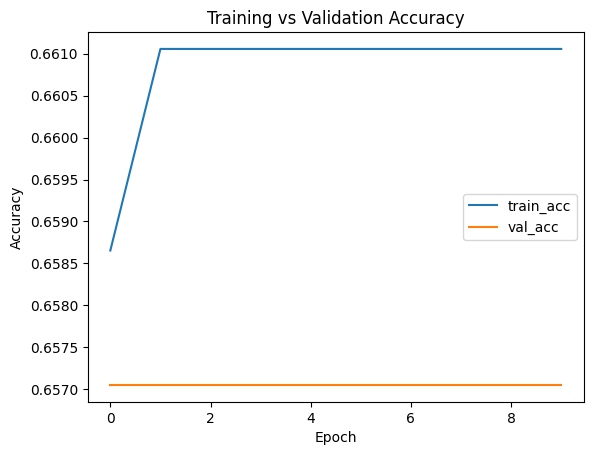

In [12]:
# Visualize training
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


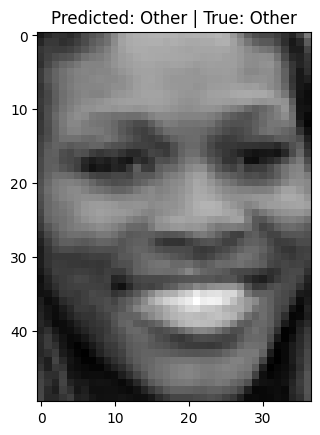

In [13]:
#Test on random images
import random
idx = random.randint(0, len(X_test)-1)
sample = X_test[idx]
pred = model.predict(sample.reshape(1, X.shape[1], X.shape[2], 1))[0][0]

plt.imshow(sample.reshape(X.shape[1], X.shape[2]), cmap='gray')
plt.title(f"Predicted: {'George W Bush' if pred>0.5 else 'Other'} | True: {'George W Bush' if y_test[idx]==1 else 'Other'}")
plt.show()